In [1]:
import pubchempy as pcp
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('C:\\Users\\nilav\\NCI Cell Lines\\Carboplatin_metabolic_NCI.csv')
X = data.select_dtypes('float64')

In [3]:
def get_smiles(metabolite_name):
    meta = [s.strip() for s in metabolite_name.split(';')]
    l, ul = [], []
    for x in meta:
        try:
            result = pcp.get_properties(["IsomericSMILES"], x, "name")
            l.append(result[0]["IsomericSMILES"])
        except:
            ul.append(x)
    return l, ul

In [4]:
meta = list(X.columns)

In [5]:
smiles_list = []
for metabolite_name in meta:
    smiles, no_smiles = get_smiles(metabolite_name)
    if smiles is not None:
        smiles_list.append(smiles)

In [6]:
len(smiles_list)

2182

In [7]:
smiles_list

[['CC(=O)C', 'CCC=O', 'CC(=O)C'],
 ['C/C=N/O'],
 ['CC(=O)[O-]'],
 ['C(=O)(N)N'],
 ['CC(C)O', 'CCCO'],
 ['C(=O)(O)[O-]', 'C(=O)(O)[O-]'],
 ['CSC'],
 ['C#CCC=O'],
 ['C1CC=[NH+]C1'],
 ['C=CC(=O)N'],
 ['C(C=O)C=O', 'CC(=O)C=O', 'C=CC(=O)[O-]', 'C(C=O)C=O', 'CC(=O)C=O'],
 ['C(CN)C=O', 'CC(=O)CN', 'CC(=O)C[NH3+]', 'C(CN)C=O'],
 ['C(=O)C(=O)[O-]'],
 ['CCC(=O)[O-]'],
 ['C(C(=O)O)N'],
 ['C(C(=O)O)O', 'C(C(=O)O)O'],
 [],
 ['C1CC(=O)NC1'],
 ['C/C=C/C(=O)O', 'CC(=O)C(=O)C', 'C1CC(=O)OC1', 'C1COCC1=O'],
 ['C=C(C(=O)O)N', 'C=C(C(=O)O)N'],
 ['C(C=O)C(=O)[O-]', 'C(C=O)C(=O)O', 'CC(=O)C(=O)O', 'CC(=O)C(=O)[O-]'],
 ['C(CN)C(=O)O',
  'C[C@H](C(=O)O)N',
  'C[C@H](C(=O)O)N',
  'C[C@@H](C(=O)O)N',
  'C[C@@H](C(=O)O)N',
  'CNCC(=O)O',
  'C(CN)C(=O)O'],
 ['C[C@H](C(=O)O)O',
  'C[C@@H](C(=O)O)O',
  'C(CO)C(=O)[O-]',
  'C([C@H](C=O)O)O',
  'C[C@H](C(=O)O)O',
  'C(C(=O)CO)O',
  'C(C(C=O)O)O',
  'C(CO)C(=O)O',
  'C[C@@H](C(=O)O)O',
  'C(C(=O)CO)O'],
 ['CC(C(C)O)O'],
 [],
 ['C(C(CO)O)O'],
 ['C1=CC=C(C=C1)N'],
 ['C

In [13]:
final_smiles = []
for i in smiles_list:
    for j in i:
        final_smiles.append(j)

In [17]:
import sys

!{sys.executable} -m pip install rdkit

     --------------------------------------- 20.7/20.7 MB 11.1 MB/s eta 0:00:00


In [19]:
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from umap import UMAP

In [25]:
#convert the list of smiles into rdkit molecules

mols = [Chem.MolFromSmiles(smile) for smile in final_smiles]

In [36]:
#generate the molecular fingerprints using Morgan Fingerprint algorithm

fps = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits = 1024) for mol in mols]

In [38]:
#convert the molecular fingerprints into a feature vector matrix

matrix = np.asarray(fps)

In [40]:
#initialize k-means to cluster these fingerprints

kmeans = KMeans(n_clusters = 5, random_state = 42)
kmeans.fit(matrix)
labels = kmeans.labels_

In [60]:
reducer = UMAP(n_components=2)
embedding = reducer.fit_transform(matrix)

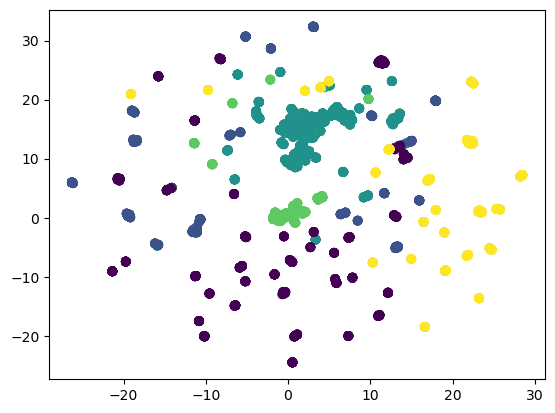

In [61]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels)
plt.show()

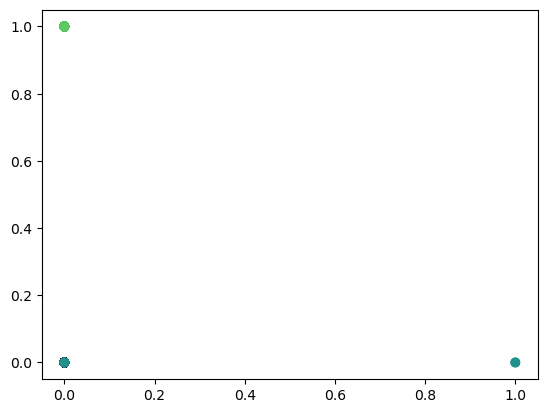

In [58]:
plt.scatter(matrix[:, 6], matrix[:, 7], c=labels)
plt.show()

In [53]:
from rdkit.ML.Cluster import Butina

dist_cutoff = 0.5 
clusters = Butina.ClusterData(fps, len(fps), dist_cutoff, isDistData=True)

TypeError: '<=' not supported between instances of 'ExplicitBitVect' and 'float'